# 基于Mindspore构造非对称似然损失函数

获取 logits 和标签之间的负对数似然损失。

reduction=none 的 nll loss 可以描述为：
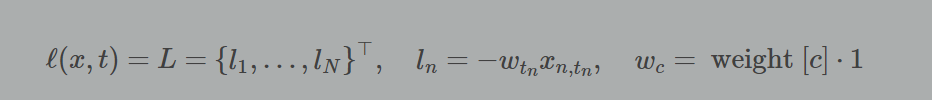

其中 x 是输入，t 是目标。w 是权重。N 是批量大小。c 属于 [0, C-1] 是类索引，其中 C 是类数。

如果 reduction 不是“none”（默认为“mean”），则
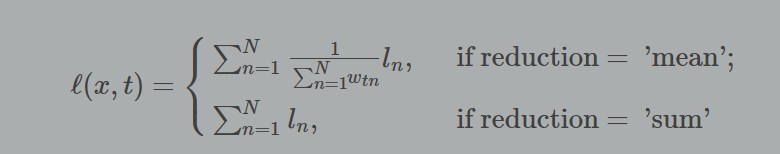

参数：

    reduction ( string ) – 将特定的归约方法应用于输出：'none'、'mean'、'sum'。默认值：“均值”。

输入：

    input (Tensor) - 输入 logits，有形状(N,C). 数据类型仅支持 float32 或 float16。

    target (Tensor) - 地面实况标签，带有形状(N). 数据类型只支持 int32。

    weight (Tensor) - 每个类的重新缩放权重，具有形状(C)并且数据类型仅支持 float32 或 float16`。


输出：
    由loss和total_weight组成的 2 个张量的元组。
    
    loss (Tensor) - 当reduction为none且输入为 2D 张量时，损失形状为(N,)。否则，损失是一个标量。数据类型与输入相同。
    

    total_weight (Tensor)  - total_weight是一个标量。数据类型与权重相同。

   TypeError – 如果 x 和权重数据类型不是 float16 或 float32 张量，则目标数据类型不是 int32 张量。
    

   ValueError – 如果 x 不是一维或二维张量，则目标和权重不是一维张量。当x为二维张量时，x的第一维不等于target，x的第二维不等于weight。当 x 是一维张量时，x、target 和 weight 的维度应该彼此相等。

In [12]:
import numpy as np
import mindspore.nn as nn
import mindspore.ops as ops
from mindspore import Tensor
input_tensor = Tensor(np.array([[0.5488135, 0.71518934],
                                [0.60276335, 0.5448832],
                                [0.4236548, 0.6458941]]).astype(np.float32))
target = Tensor(np.array([0, 0, 0]).astype(np.int32))
weight = Tensor(np.array([0.3834415, 0.79172504]).astype(np.float32))
nll_loss = ops.NLLLoss(reduction="mean")
loss, weight = nll_loss(input_tensor, target, weight)
print(loss)
print(weight)

-0.52507716
1.1503246
